## Ariane particels on long MITgcm run (CNT03)

10 particles initialized at dufferent upstream positions and depths in CNT run03.

In [42]:
from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

#from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys
#####
from matplotlib import pylab

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.cm as cm

from matplotlib import animation


In [43]:

import canyon_tools.readout_tools as rout
import canyon_tools.metrics_tools as mpt

In [44]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [45]:
CGrid ='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob_cropped.nc' 

CGridOut=Dataset(CGrid)
CState ='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob_cropped.nc' 

#for dimobj in CGridOut.variables.values():
#    print dimobj



In [46]:

# General input
npart = 10
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 


rc = CGridOut.variables['RC']
zl = CGridOut.variables['Zl']


dxf = CGridOut.variables['dxF']
xc = rout.getField(CGrid, 'XC') # x coords tracer cells
yc = rout.getField(CGrid, 'YC') # y coords tracer cells

rA = rout.getField(CGrid, 'rA') 

drF = CGridOut.variables['drF'] # vertical distance between faces
drC = CGridOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGrid, 'HFacC')
mask_NoC = rout.getMask(CGrid, 'HFacC')

bathy = rout.getField(CGrid,'Depth')
times = np.arange(0,nt,1)


In [47]:
f = Dataset('/ocean/kramosmu/Ariane/TracerExperiments/CNTDIFF/run03_10part/ariane_trajectories_qualitative.nc','r');


In [48]:
f_lont = f.variables['traj_lon']
f_latt = f.variables['traj_lat']
f_dept = f.variables['traj_depth']
f_timet = f.variables['traj_time']

f_zs = f.variables['init_z']
f_xs = f.variables['init_x']
f_ys = f.variables['init_y']
f_lont.shape

(19, 10)

Particles started at day 8.5


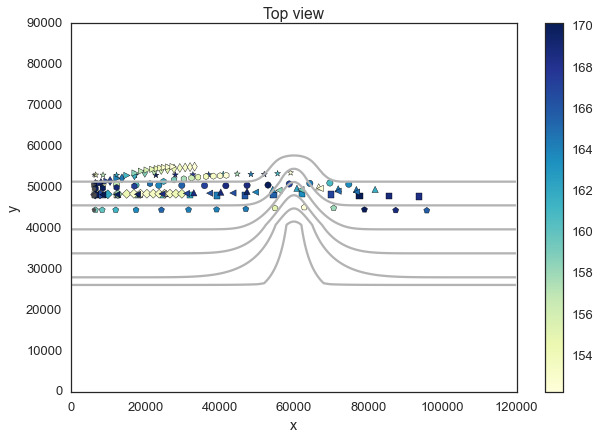

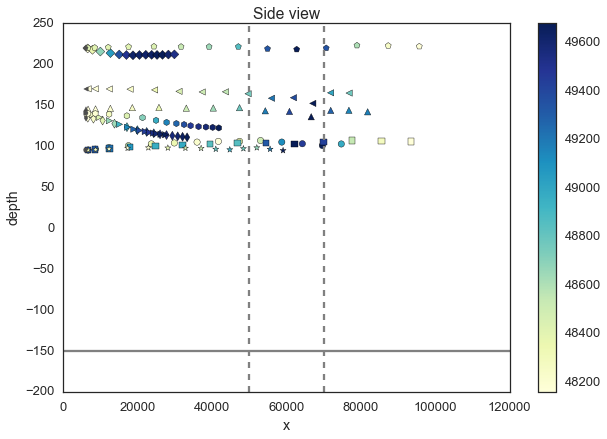

In [49]:
n = np.arange(npart)
colors = cm.rainbow(np.linspace(0, 1, len(n)))
mkr = ['o','s','*','^','D','d','p','>','h','<']
# 2D
fig, ax = plt.subplots(1,1,figsize=(10,6.6))
ax.contour(xc,yc,bathy,[150,350,550,750,950,1150],colors = '0.70')
for N,mm in zip(n,mkr):
    sca = ax.scatter(f_lont[1:15,N],f_latt[1:15,N],c=f_dept[1:15,N],marker = mm,s=40,cmap = 'YlGnBu')
    ax.scatter(f_lont[0,N],f_latt[0,N],color='0.30',marker=mm)


plt.colorbar(sca)

ax.set_xlim([0,120000])
ax.set_ylim([0,90000])
ax.set_title('Top view')
ax.set_xlabel('x')
ax.set_ylabel('y')


# 2D
fig, ax = plt.subplots(1,1,figsize=(10,6.6))
for N,mm in zip(n,mkr):
    sca=ax.scatter(f_lont[1:15,N],f_dept[1:15,N],c=f_latt[1:15,N],marker=mm,s=40,cmap = 'YlGnBu')
    ax.scatter(f_lont[0,N],f_dept[0,N],color='0.30',marker=mm)
plt.colorbar(sca)
ax.axhline(y=-150.0,color = '0.5')
ax.axvline(x=70000.0,color = '0.5', linestyle = '--')
ax.axvline(x=50000.0,color = '0.5', linestyle = '--')

ax.set_xlim([0,120000])

ax.set_title('Side view')
ax.set_xlabel('x')
ax.set_ylabel('depth')

print('Particles started at day 8.5')

In [50]:
print(f_timet[18,:])

[ 0.94736842  0.94736842  0.94736842  0.94736842  0.94736842  0.94736842
  0.94736842  0.94736842  0.94736842  0.94736842]


The last output is empty (dead end)

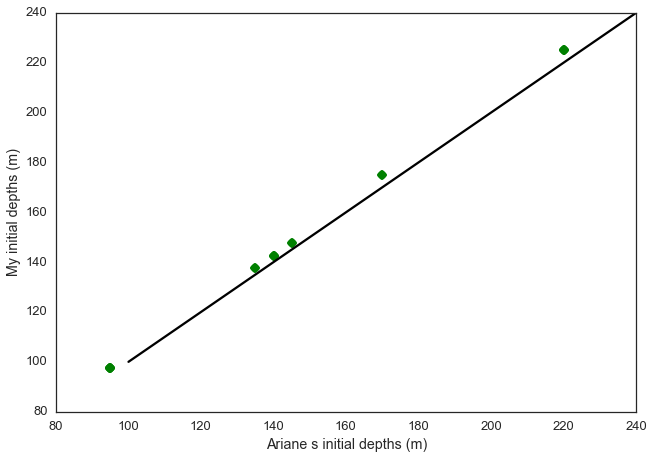

In [51]:
# Compare depths: initial positions
initial_depths = [-rc[19],-rc[19],-rc[19],-rc[29],-rc[39],-rc[27],-rc[39],-rc[28],-rc[28],-rc[34]]
plt.plot(f_dept[0,:],initial_depths,'go')

plt.plot([100,240],[100,240],'k-')
plt.ylabel('My initial depths (m)')
plt.xlabel('Ariane s initial depths (m)')

My initial values are deeper than Ariane is interpreting them.

In [52]:
10.000  227.000  20.0   1.0    1.0
      10.000  210.000  20.0   1.0    1.0
      10.000  240.000  20.0   1.0    1.0
      10.000  210.000  30.0   1.0    1.0
      10.000  210.000  40.0   1.0    1.0
      10.000  227.000  28.0   1.0    1.0
      10.000  180.000  40.0   1.0    1.0
      10.000  226.000  29.0   1.0    1.0
      10.000  220.000  29.0   1.0    1.0
      10.000  210.000  35.0   1.0    1.0



SyntaxError: invalid syntax (<ipython-input-52-1b64e0e5ac7e>, line 1)

In [ ]:
print(f_timet[:])